In [2]:
#  Deportista 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\Dep2.xlsx"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo;")
pantorrilla = extraer_bloque(df, 8, 9, 10, "Pantorrilla")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")
tobillo = extraer_bloque(df, 20, 21, 22, "Tobillo")
rodilla = extraer_bloque(df, 24, 25, 26, "Rodilla")


Preview de Pie:


,Tiempo,X,Y
4,0.000000,-36.562473,-6.975494
5,33.366665,-36.562542,-6.975517
6,66.733330,-36.562595,-6.975594
7,100.099998,-36.562660,-6.975662
8,133.466660,-36.562763,-6.975784



Preview de Muslo;:


,Tiempo,X,Y
4,0.000000,-16.524223,13.503998
5,33.366665,-16.524204,13.503998
6,66.733330,-16.524164,13.503983
7,100.099998,-16.524111,13.503967
8,133.466660,-16.524019,13.503929



Preview de Pantorrilla:


,Tiempo,X,Y
4,0.000000,-17.568508,-4.360695
5,33.366665,-17.568508,-4.360695
6,66.733330,-17.568443,-4.360703
7,100.099998,-17.568365,-4.360695
8,133.466660,-17.568272,-4.360725



Preview de Cadera:


,Tiempo,X,Y
4,0.000000,-22.041862,22.321964
5,33.366665,-22.041809,22.321934
6,66.733330,-22.041651,22.321934
7,100.099998,-22.041447,22.321899
8,133.466660,-22.041203,22.321827



Preview de Sacro:


,Tiempo,X,Y
4,0.000000,-28.967752,30.069122
5,33.366665,-28.967598,30.069054
6,66.733330,-28.967379,30.068954
7,100.099998,-28.967093,30.068817
8,133.466660,-28.966726,30.068630



Preview de Tobillo:


,Tiempo,X,Y
4,0.000000,-34.019455,3.666100
5,33.366665,-34.019463,3.666077
6,66.733330,-34.019485,3.665977
7,100.099998,-34.019493,3.665848
8,133.466660,-34.019489,3.665680



Preview de Rodilla:


,Tiempo,X,Y
4,0.000000,-4.130281,-8.217163
5,33.366665,-4.130326,-8.217178
6,66.733330,-4.130379,-8.217186
7,100.099998,-4.130430,-8.217224
8,133.466660,-4.130481,-8.217270


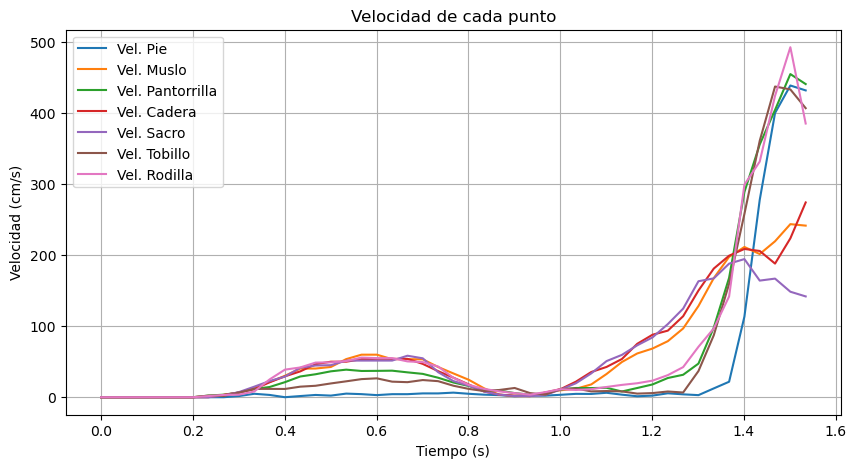

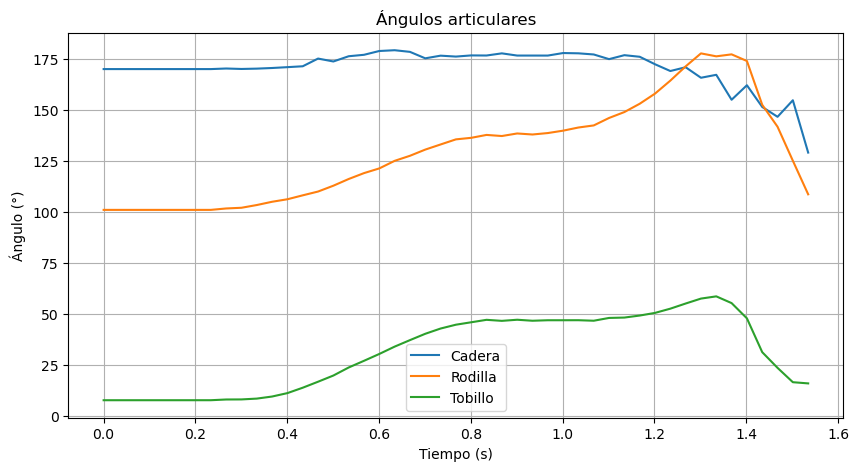


==== Pie ====
Velocidad total MAX: 438.951 cm/s
Velocidad total MIN: 0.002 cm/s
Velocidad en X MAX: 414.248 cm/s
Velocidad en X MIN: -6.453 cm/s
Velocidad en Y MAX: 240.014 cm/s
Velocidad en Y MIN: -11.852 cm/s

==== Muslo ====
Velocidad total MAX: 243.725 cm/s
Velocidad total MIN: 0.001 cm/s
Velocidad en X MAX: 242.947 cm/s
Velocidad en X MIN: -26.073 cm/s
Velocidad en Y MAX: 70.798 cm/s
Velocidad en Y MIN: -6.918 cm/s

==== Pantorrilla ====
Velocidad total MAX: 455.023 cm/s
Velocidad total MIN: 0.000 cm/s
Velocidad en X MAX: 438.138 cm/s
Velocidad en X MIN: -23.222 cm/s
Velocidad en Y MAX: 123.050 cm/s
Velocidad en Y MIN: -6.742 cm/s

==== Cadera ====
Velocidad total MAX: 274.265 cm/s
Velocidad total MIN: 0.002 cm/s
Velocidad en X MAX: 273.621 cm/s
Velocidad en X MIN: -17.546 cm/s
Velocidad en Y MAX: 69.619 cm/s
Velocidad en Y MIN: -1.445 cm/s

==== Sacro ====
Velocidad total MAX: 194.526 cm/s
Velocidad total MIN: 0.005 cm/s
Velocidad en X MAX: 184.671 cm/s
Velocidad en X MIN: -6.20

In [3]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pant = calcular_velocidad(pantorrilla)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)
vel_tobi = calcular_velocidad(tobillo)
vel_rodi = calcular_velocidad(rodilla)


def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pantorrilla[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pant[2], label="Vel. Pantorrilla")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.plot(tiempo_seg, vel_tobi[2], label="Vel. Tobillo")
plt.plot(tiempo_seg, vel_rodi[2], label="Vel. Rodilla")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pantorrilla", vel_pant)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)
resumen_vel("Tobillo", vel_tobi)
resumen_vel("Rodilla", vel_rodi)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)

